# Ising Model
The Ising hamiltonian $$ H = -J \sum \limits_{\left<ij\right>} S_{i}S_{J}$$
- The spins $S_{i}$ can take values $\pm 1$,
- $\left<ij\right>$  implies nearest-neighbor interaction only,
- $J>0$ is the strength of exchange interaction

The system experiences a significant transformation known as a 2nd order phase transition when reaching the critical temperature, denoted as $T_{c}$. As the temperature drops below $T_{c}$, the system becomes magnetized, entering a state termed the ferromagnetic or ordered state. This state is characterized by a widespread alignment of spins, resulting from the influence of local interactions. Conversely, when temperatures exceed $T_{c}$, the system shifts into the disordered or paramagnetic state. Here, long-range correlations between spins are absent, leading to a lack of overall alignment.

The order parameter $m=⟨S⟩/N$, for this system is the average magnetization. It serves as a distinguishing factor between the two distinct phases observed within the system. Specifically, m assumes a value of zero in the disordered state, signifying the absence of overall alignment. Conversely, in the ordered ferromagnetic state, m takes on a non-zero value, reflecting the presence of alignment.

Interestingly, while the one-dimensional (1D) Ising model does not manifest phase transitions, higher dimensions exhibit this phenomenon. This distinction can be rationalized through Peierls' arguments, which concern the net change in free energy $F=E−TS$. In this equation, E represents the system's energy, while S stands for entropy. Analyzing the introduction of disorder into an initially ordered system, we can estimate the net change in free energy. The stability of the ordered state hinges on a positive net change in free energy, $\Delta F>0$ at any non-zero temperature.

### Monte-Carlo simulation of 2D Ising model
The following code simulates the Ising model in 2D using the Metropolis algorithm. The main steps of Metropolis algorithm are:

1. Prepare an initial configuration of N spins
2. Flip the spin of a randomly chosen lattice site.
3. Calculate the change in energy $dE$.
4. If $dE < 0$, accept the move. Otherwise accept the move with probability $e^{-dE/T}$. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat 2-4.

In the code below, we have estimated and plotted energy, magnetization, specific heat and susceptibility of the system.

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

In [5]:
nt = 88         #  number of temperature points
N = 16         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2 = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

In [6]:
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

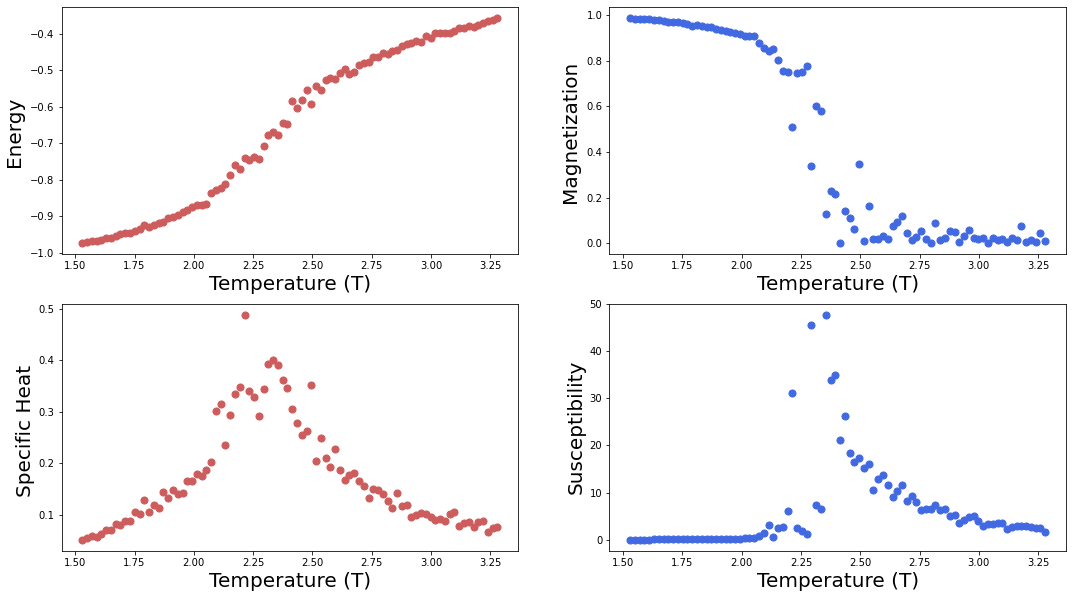

In [7]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp = f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp = f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp = f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp = f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

### Snapshots of the configurations
Start with a random initial condition and then plot the instantaneous configurations, as the system coarsens to its equilibrium state.

In [8]:
# Simulating the Ising model

%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

In [9]:
rm = Ising()

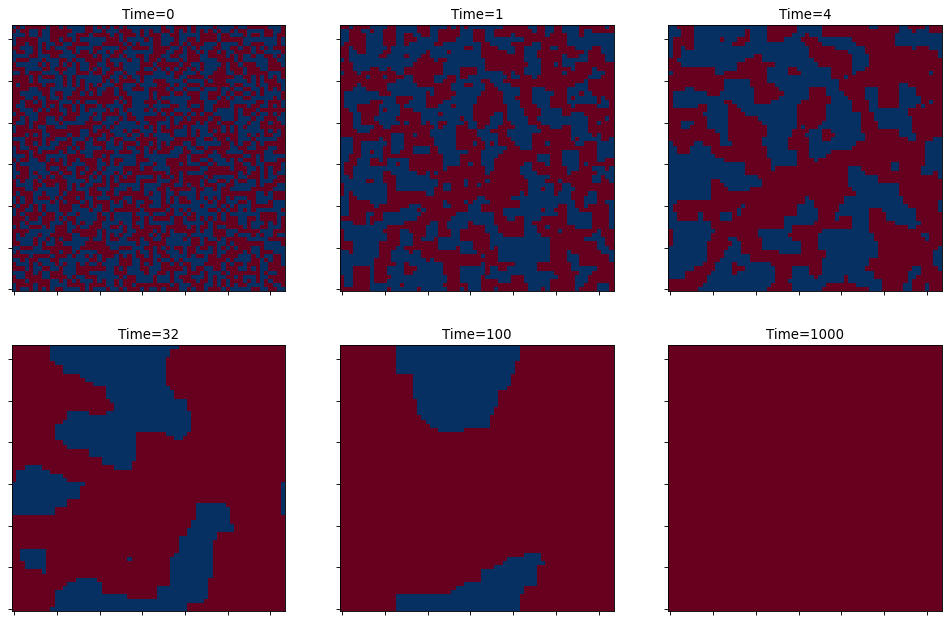

In [10]:
rm.simulate()

### Kinetic Ising Models
In contrast to the traditional Ising model, which relies solely on a Hamiltonian to drive its dynamics, the realm of Kinetic Ising Models introduces a new dimension by incorporating the influence of an associated heat bath in generating spin flips $(S_{i}\to −S_{i})$. The focus here shifts from equilibrium to kinetics, where the interplay between spins and their evolving states takes center stage.

These Kinetic Ising Models encompass a spectrum of kinetic behaviors, each shedding light on distinct aspects of system evolution:

1. Non-Conserved Kinetics:
   - In the realm of spin systems, a non-conserved kinetics scenario unfolds.  This is exemplified by the spin-flip Glauber model, a microscopic description that captures the transition from paramagnetic to ferromagnetic states.
2. Conserved Kinetics in Binary Mixtures:
   - The binary (AB) mixture, or Lattice Gas, introduces another facet of kinetic behavior. Here, conserved kinetics govern the dynamics, particularly relevant to binary mixtures. The spin-exchange Kawasaki model comes into play, elucidating the intricate interplay between different components.
   
The term "Kinetic Ising models" often encompasses purely dissipative and stochastic frameworks, where the focus is on understanding the dissipative processes and stochastic fluctuations that shape the dynamic evolution of the system.

At a higher level of abstraction, these models utilize order parameters, denoted as $\phi(\vec{r} ,t)$, to succinctly capture and describe the evolving dynamics. These order parameters provide a macroscopic perspective, enabling the exploration of system-wide changes over time.

### Domain Growth with Non-Conserved Kinetics
- At the initial time t=0, a paramagnetic phase is rapidly quenched below the critical temperature $T_{c}$ 
- The paramagnetic state is no longer the preferred equilibrium state
- The far-from-equilibrium, homogeneous, state evolves towards its new equilibrium state by separating in domains
- These domains coarsen with time and are characterized by length scale $L(t)$
- A finite system becomes ordered in either of two equivalent states as $t \to \infty$
- The simplest kinetics Ising model for non-conserved scalar field $\phi(\vec{r})$ is the time dependent Ginzburg-Landau (TDGL) model

### TDGL equation 
The equation of motion for $\phi$ can be written as: $$\frac{\partial \phi}{\partial t} =−\Gamma \frac{\partial F}{\partial \phi} + \theta(\vec{r} ,t)$$
 
where $\frac{\partial F}{\partial \phi}$ denotes functional derivative of free-energy functional $$F(\phi)=\int\left[a\phi^{2}+b\phi^{4}+\frac{1}{2}K(\Delta \phi)^{2}\right]$$
 
For  $T<T_{c}$, we can write TDGL in terms of rescaled variables as $$\frac{\partial \phi}{\partial t}=\phi−\phi^{3}+\Delta^{2}\phi$$

In [11]:
# Simulating the TDGL equation

%matplotlib inline
import numpy as np
from __future__ import division
from scipy.sparse import spdiags,linalg,eye
import matplotlib.pyplot as plt


a,b, k = 0, 1.0, 100.0
dh, dt = 1.0, 1e-3
Ng, Tf = 256, 10001

class TDGL():
    '''
    Class to solve a PDE 
    '''
    def mu(self, u):
        return a*u + b*u*u*u 

    def laplacian(self, Ng):
        '''Construct a sparse matrix that applies the 5-point Laplacian discretization'''
        e=np.ones(Ng**2)
        e2=([1]*(Ng-1)+[0])*Ng
        e3=([0]+[1]*(Ng-1))*Ng
        h=dh
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-Ng,Ng],Ng**2,Ng**2)
        A/=h**2
        return A

    def integrate(self, L, x, y, u):
        '''  simulates the equation and plots it at different instants '''
        
        f = plt.figure(figsize=(15, 15), dpi=80);    

        for i in range(Tf):          
            u = u - dt*(self.mu(u) - k*L.dot(u))
            
            if (i==0):      self.configPlot(x, y, u, f, 1, i);
            if (i==1):      self.configPlot(x, y, u, f, 2, i);
            if (i==10):     self.configPlot(x, y, u, f, 3, i);
            if (i==100):    self.configPlot(x, y, u, f, 4, i);
            if (i==1000):   self.configPlot(x, y, u, f, 5, i);
            if (i==10000):  self.configPlot(x, y, u, f, 6, i);
     
    def configPlot(self, x, y, u,f, n_, i):
        U= u.reshape((Ng, Ng))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(x,y,U, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)
    plt.show()

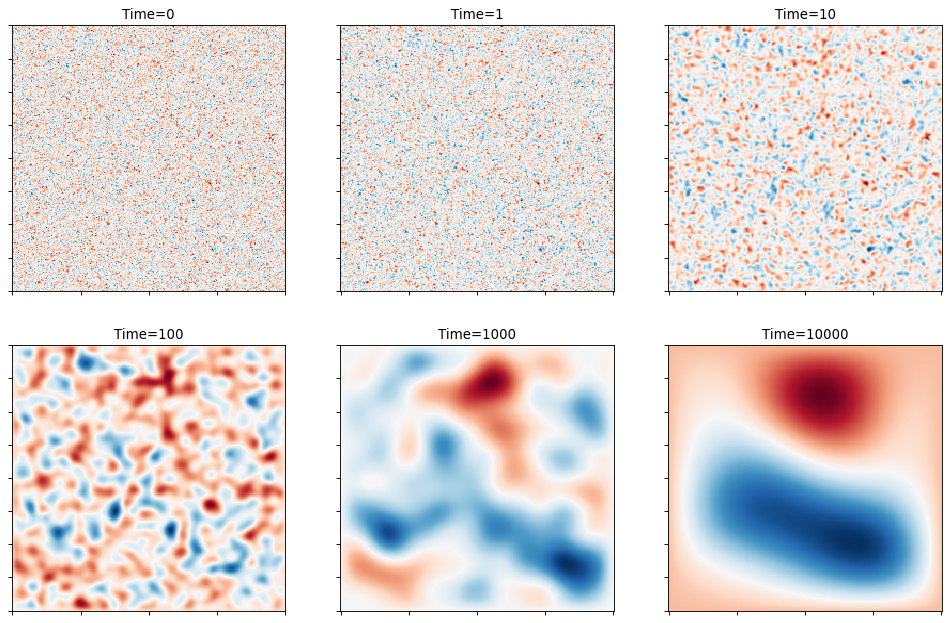

In [12]:
rm = TDGL()   # instantiate the class

# generate the grid and initialise the field
x = np.linspace(-1,1,Ng)
y = np.linspace(-1,1,Ng)
X, Y = np.meshgrid(x, y)

u=np.random.randn(Ng*Ng, 1);  # Initial data
L = rm.laplacian(Ng)         # construct the laplacian
rm.integrate(L, x, y, u)    # simulate

Indeed, the time evolution observed in the Monte Carlo simulation of the Ising model and that described by the Time-Dependent Ginzburg-Landau (TDGL) equation showcases a noteworthy similarity. While the TDGL equation functions as a hydrodynamic model, the Ising model simulation delves into the molecular level. Despite this disparity in their underlying principles, a striking resemblance is evident in the observed time evolution.

This similarity between the two disparate models is a noteworthy outcome, aligning with our expectations. It underscores the power of modeling and simulation techniques in revealing common patterns and behaviors across different systems. The fact that both the macroscopic, hydrodynamic behavior described by the TDGL equation and the microscopic interactions of the Ising model exhibit similar temporal patterns reinforces the notion of universality in physical phenomena.